# Bikeccident
*A Look Into NYPD Manhattan Bike Collision Data*

#### Intro

My first summer interning in Tech I spent the leftovers of my first real paycheck on my first real bike: a sporty commuter that would replace the fifty pound, flat-tired mountain bike I had been sweating on for the past forever. My commutes became fast and my joyrides long. Now the bike and I go everywhere. 

Everywhere I bike to in New York City, however, there's this looming fear of every mile bringing me one closer to a crash. The white bicycles tied to posts, the concerned texts from mom, the close calls with cabs- all these don't help. This Notebook looks a little bit into NYPD's motor vehicle collision data (which you can find in its original form at  http://www.nyc.gov/html/nypd/html/traffic_reports/motor_vehicle_collision_data.shtml). With it I'll try to visualize where collisions are happening, the most common reason for them to happen, and if it's worth it to ride in a bike lane. 

I pull the data from the most recent month (currently July 2015) for Manhattan. My future changes will be to look for the entire year over all five boroughs. It is my understanding that the collisions only represent those reported to/by the police; any accidents that occur unreported won't appear. For this reason the raw number of collisions isn't super relevant on its own - only in relation to time, location or contributing factor can we see something useful. 

Most of this project was just an excuse to play with Python and some of its visualization libraries, but I hope it's of some interest to you with or without a coding background!

In [3]:
import CollisionDataFetcher
import CollisionMapper
import CollisionPlotter
import FoliumUtilities

collisions = CollisionDataFetcher.fetchData()

#### Collision Mapping

The NYPD Collision data gives the locations of collisions as street intersections. Below you can see them displayed as blue circles. If the collision resulted in cyclist death, the circle will be purple (there are none on the map for July 2015).  If the NYPD reported a contributing factor it will appear when you click the collision. 


In [2]:
map = CollisionMapper.create_collision_map(collisions)
FoliumUtilities.inline_map(map)

Number of Collisions At Time of Mapping: 
177


#### Analysis

The first thing I wanted to know was whether it was worth it to ride out of my way to get to bike lanes only to suffer the headphoned people convinced the lanes are just extra sidewalks, the cyclists in denial that the lanes only go one way, the cars that really need the lanes to pull over to chill, and that one guy who doored me on 6th Avenue. 

I felt it should have been easier to query if a location was in a bike lane or not (maybe there is a service I missed?) I used a list of bike lane start and end points and queried cross streets by seeing if the sum of the distance from start of the bike lane to the query location and the query location to end was the same as the total length of the bike lane. Not a foolproof method, but the implementation was really time effective.

Below you can see that 14.4% of the 174 collisions to which I was able to assess bike lane-ness were on a bike lane. 85.6% were off. I would not make many conclusions from this because I feel there should be some normalization happening based on the usage of bike lanes and their prevalence in the city. That is, the 25 collisions in bike lanes could be 100% of the people who rode in a bike lane. It probably isn't, but we just don't know.


In [1]:
%matplotlib inline

Number of Collisions On Bike Lane: 25
Number of Collisions Off Bike Lane: 149
Number of Unprocessable Collisions: 3


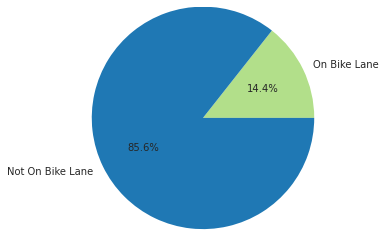

In [4]:
CollisionPlotter.graph_bike_lane_pie_chart(collisions)

The chart below shows the top fifteen streets with the highest number of collisions. Again, I would pause before making too many insights. There are many avenues on the list; we can't know if this is because avenues are inherently more dangerous or because they have more bikers than streets. Another thing to note is that because the NYPD reports the collisions by their cross streets we can't know if the cyclists were truly biking on the reported street or its intersector. 

This all being said there might be some significance in 1st and 2nd Avenue being at the top. I biked almost exclusively on these two avenues to commute this past summer. 1st has a long, protected bike lane section. 2nd is a bit of a nightmare with all the construction, MTA buses and the Queensboro Bridge intersection; still its nether regions are nicely bike laned. My thought was that these are the main routes for navigating the east side of the island. The west side has the wonderful Hudson River Parkway. I would like to think connecting the East River park at 30-Somethingth street to the upper 70-Somthingth street portion would help with all the east side collisions. 

Another point of interest is that 14th street appears among all the avenues. If we consult the map, we see there's a hotspot at the 8th Avenue intersection. Maybe it's the fancy CVS there? 

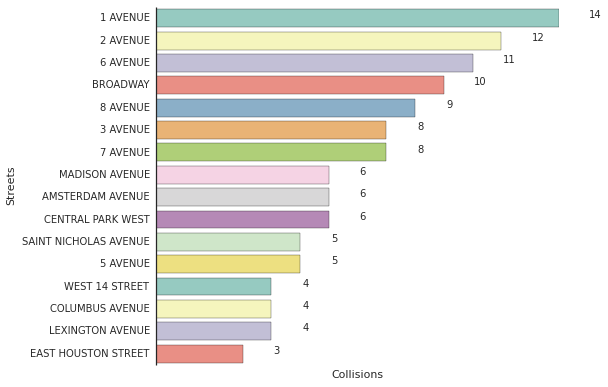

In [5]:
CollisionPlotter.graph_hotspot_streets(collisions)

The NYPD also releases what they call the contributing factors of a collision. 37.9% of the collisions don't have any factors reported with them. Of the remaining 110 collisions for which there is some data, pedestrian or bike error causes 18.1% of the collisions. Various driver related errors contribute to the remaining 81.9% with driver inattention or distraction leading the pack at 25.5%.

I've always had the sense that the NYPD, like normal human beings, hate bikers and would let them top the contributing factors chart. It's quite the opposite. Let this clear the name of both me with my cyclist brethren as well as the NYPD.

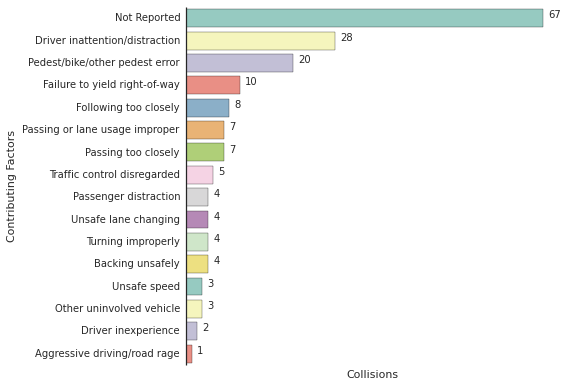

In [4]:
CollisionPlotter.graph_contributing_factors(collisions)

This final chart looks into the vehicles involved in the collisions. I am always afraid of the MTA buses (probably because I use the bus-only lane as a giant red bike lane), but they're apparently not so bad compared to passenger vehicles. Again though, passenger vehicles probably make up a disproportianate number of the vehicles on the road. Bus collisions might not be as relatively few as they look.

Another oddity: I have never seen a pick-up truck in Manhattan, and yet they have somehow caused six collisions. Terrifying.

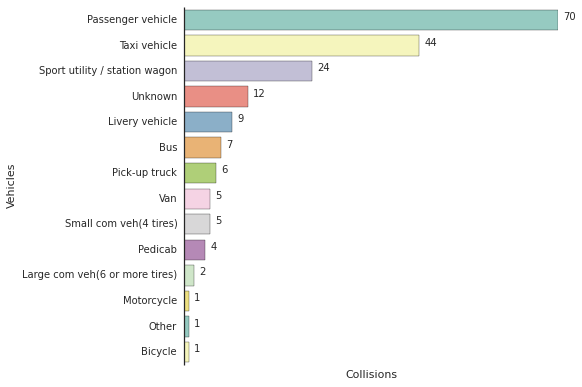

In [5]:
CollisionPlotter.graph_vehicle_type(collisions)

#### Final Remarks

The NYPD Collision data gave me more questions to ask than answers to find. I don't think I will be changing my cycling habits based on any of my analysis. In the end I'm just happy I got to use so many nice colors on graphs.

Thanks for reading,
Alice Rottersman